# 教師あり学習

### データセットの作成

説明を簡単にするために、低次元で単純なデータセットを作成する

In [1]:
import sys
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import mglearn
%matplotlib inline

/Users/emori/Documents/Python_playground/IntroductiontoMachineLearningwithPython/.intro_ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


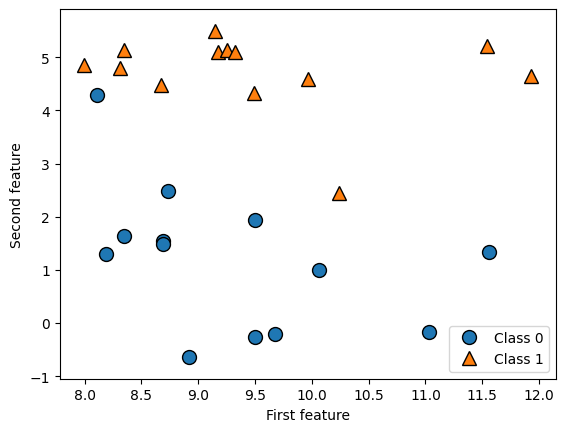

X.sape: (26, 2)


In [2]:
# クラスタリング用のデータセットの作成
"""
Xは2つの特徴量をもつ26のデータで構成
"""
X, y = mglearn.datasets.make_forge()

# プロット
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print(f"X.sape: {X.shape}")

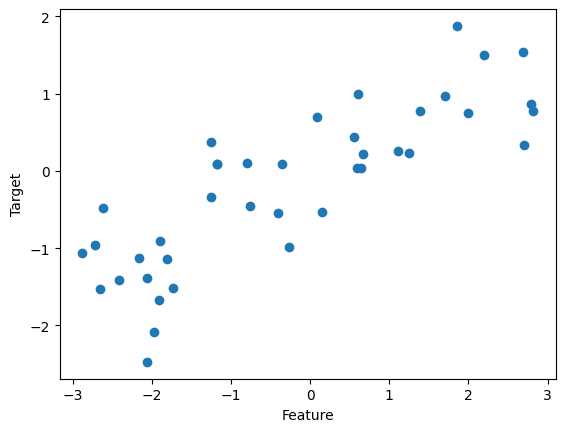

In [3]:
# 回帰アルゴリズム用のデータセットの作成
X,y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [4]:
# 合成データを補うデータセット
# ほんの34~5p読んでちょ（書くのめんどい)

## k-最近傍法(k-nn)
教師ありの単純な学習モデル、訓練データセットの中から最も近い点を見つけるアルゴリズム

/Users/emori/Documents/Python_playground/IntroductiontoMachineLearningwithPython/.intro_ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


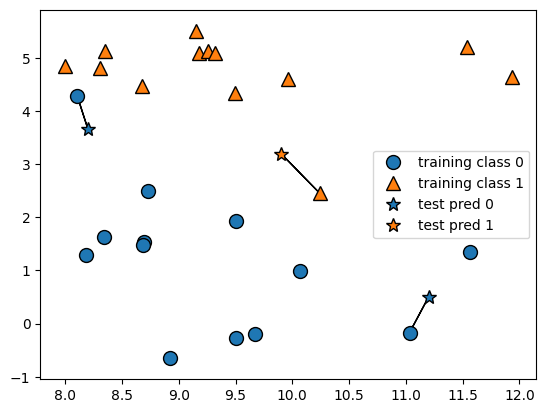

In [7]:
# クラス分類の例
# 新しいデータポイントに対して、近いものとの距離を出してる

# 1つの近傍点（最も近い点)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/emori/Documents/Python_playground/IntroductiontoMachineLearningwithPython/.intro_ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


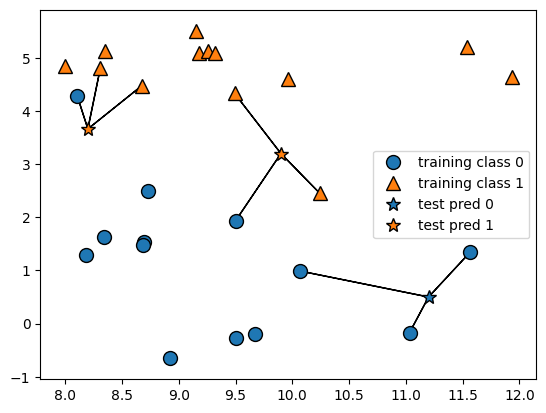

In [9]:
# 3つの近傍点
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
# scikit-learnによる最近傍法

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# 訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/Users/emori/Documents/Python_playground/IntroductiontoMachineLearningwithPython/.intro_ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [18]:
# scikitlearnの最近傍法
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print(f"Test set predictions:\n{prediction}")
print(f"Test set Answers    :\n{y_test}")

print(f"Test set accuracy:{clf.score(X_test, y_test):{1}.{2}}")

Test set predictions:
[1 0 1 0 1 0 0]
Test set Answers    :
[1 0 1 0 1 1 0]
Test set accuracy:0.86


### KnnClassifierの解析

2次元のデータセット出るため、x,y平明にプロットできる  
平面をクラスに従って色づけし、決定境界を表示してみる

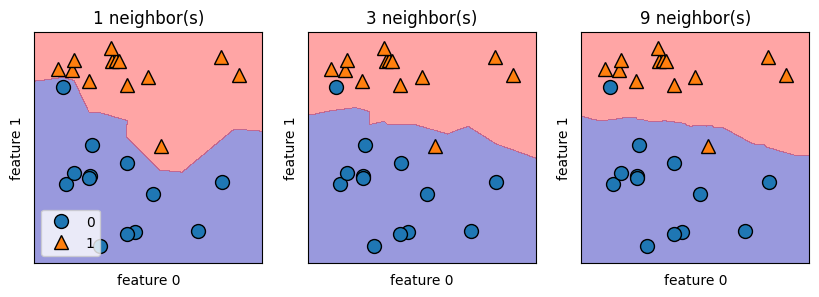

1つの最近傍点のみだと、決定協会が訓練データに近づくが、多くの最近傍点を用いると境界は滑らか＝＞単純なモデルになる


In [20]:
fig, axes = plt.subplots(1,3,figsize = (10,3))

# kが1,3,9の場合の決定境界を描画
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

plt.show()

print("1つの最近傍点のみだと、決定協会が訓練データに近づくが、多くの最近傍点を用いると境界は滑らか＝＞単純なモデルになる")

次に汎化と複雑さの関係を確認する  
sklernの高次元のデータを使って精度と最近傍点の数の関係性を見る

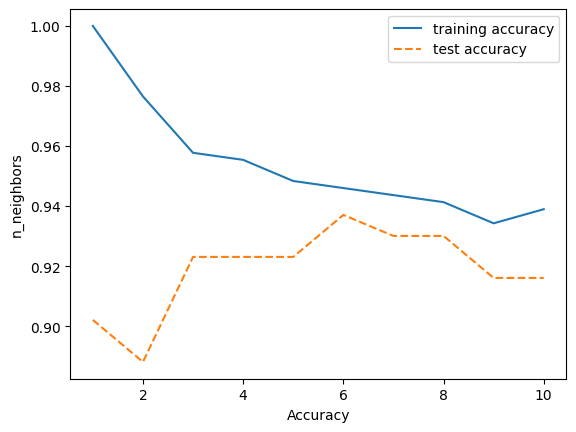

In [22]:
from sklearn.datasets import  load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# kの値を1~10まで試す
neighbors_setting = range(1,11)

for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # 訓練セット精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy", linestyle="--")
plt.xlabel("Accuracy")
plt.ylabel("n_neighbors")
plt.legend()

